**Metodologia**

1. Carregamento e Filtragem Geográfica: O processo inicia-se com o carregamento otimizado dos microdados, utilizando uma abordagem de leitura em blocos (chunks) para gerenciar eficientemente a memória. Em seguida, foi aplicado um filtro geográfico para isolar os registros correspondentes ao estado do Rio de Janeiro (RJ), definindo o escopo regional primário da análise.

2. Seleção de Atributos (Features): Foram selecionadas 42 variáveis consideradas relevantes para o estudo, abrangendo notas das provas, informações do questionário socioeconômico e dados demográficos.

3. Tratamento de Variáveis com Dados Faltantes (MNAR): Variáveis como "tipo de escola" foram removidas do estudo. A justificativa para tal remoção reside no padrão de dados faltantes, caracterizado como MNAR. Isso ocorre porque, para certos subgrupos de respondentes (ex: participantes que já concluíram o ensino médio), o preenchimento de tais campos não se aplica. Dada a alta incidência de valores ausentes nessas colunas, a decisão metodológica foi por sua exclusão, a fim de evitar a introdução de viéses ou a necessidade de imputações complexas.

4. Tratamento de Observações Ausentes: Registros de participantes com ausência registrada em qualquer uma das provas objetivas foram removidos. Esta etapa é crucial para garantir que a análise se concentre exclusivamente no público-alvo do estudo: os estudantes que efetivamente realizaram o exame. Após a limpeza inicial, identificou-se uma incidência residual de valores ausentes nas notas das provas. Dada a baixa representatividade destes casos (inferior a 1% da amostra), optou-se pela exclusão completa dos registros correspondentes.

5. Análise Exploratória de Dados: A etapa final do pré-processamento consistiu em uma Análise Exploratória para validar a limpeza e compreender as características do dataset resultante. Foram geradas estatísticas descritivas, gráficos de distribuição para variáveis numéricas, gráficos de contagem para as categóricas e tabelas de contingência para investigar associações entre as variáveis.

6. Replicação do Pipeline para Generalização: Com o objetivo de testar a robustez e a generalização da metodologia e dos futuros modelos, todo o pipeline de pré-processamento descrito foi replicado para o conjunto de dados do estado do Amazonas (AM), também referente ao ano de 2023.

In [1]:
import sys
import os
import pandas as pd 

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import scripts.data_preprocessing.data_preprocessing as dp 
from scripts.data_preprocessing.var_dict import *

In [2]:
microdados_path = "C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_ENEM_2023.csv" 

filter_dict = {
    'SG_UF_PROVA': ['RJ'], 
    #'TP_ST_CONCLUSAO': [2]
}

microdados_filtrados = dp.load_and_filter_data(
    microdados_path,
    filter_conditions = filter_dict
)

microdados_filtrados.to_csv(r'C:\Users\jaret\OneDrive\Documents\UFG\TCC\ENEM - final\data\MICRODADOS_RJ_2023.csv', index=False)

In [3]:
microdados_filtrados.shape

(282296, 76)

In [4]:
microdados_filtrados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210060801597,2023,4,F,2,1,1,1,3,1,...,A,A,A,B,A,A,D,A,A,B
1,210060214085,2023,9,F,1,1,1,1,6,1,...,A,A,B,C,A,A,C,A,B,B
2,210059527734,2023,3,M,1,1,1,1,1,1,...,A,A,A,C,A,A,D,A,A,B
3,210061103942,2023,3,M,1,1,1,1,1,1,...,A,A,A,B,A,A,E,A,A,B
4,210059980945,2023,4,F,1,3,2,1,2,1,...,A,A,A,B,A,A,E,B,B,B


In [5]:
df_present_students = dp.filter_student_presence(microdados_filtrados, mode='all')

Dataset original: (282296, 76)
Após a filtragem (modo='all'): (179337, 76)


In [6]:
features_of_interest = [

    # Dados do participante 

    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO',
    
    # Dados da escola 
    
    'TP_LOCALIZACAO_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'CO_MUNICIPIO_ESC', 
    
    # Dados do local de aplicação da prova 

    'CO_MUNICIPIO_PROVA',

    # Dados da prova 

    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',

    # Dados do questionário socio-econômico 

    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
    'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
    'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
]

score_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

master_mappings = {
    "TP_FAIXA_ETARIA": TP_FAIXA_ETARIA_map,
    "TP_SEXO": TP_SEXO_map,
    "TP_COR_RACA": TP_COR_RACA_map,
    "TP_ESCOLA": TP_ESCOLA_map,
    "TP_LOCALIZACAO_ESC": TP_LOCALIZACAO_ESC_map,
    "TP_DEPENDENCIA_ADM_ESC": TP_DEPENDENCIA_ADM_ESC_map,
    "TP_ENSINO": TP_ENSINO_map,
    'TP_ST_CONCLUSAO': TP_ST_CONCLUSAO_map,
    ("Q001", "Q002"): Q001_Q002_map,
    ("Q003", "Q004"): Q003_Q004_map,
    "Q005": Q005_map,
    "Q006": Q006_map,
    "Q007": Q007_map,
    tuple(["Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017"]): Q008_Q017_map,
    "Q018": Q018_map,
    "Q019": Q019_map,
    "Q020": Q020_map,
    "Q021": Q021_map,
    "Q022": Q022_map,
    "Q023": Q023_map,
    "Q024": Q024_map,
    "Q025": Q025_map, 
    
}

In [7]:
df_features = dp.select_and_map_features(
    df=df_present_students,
    columns_to_select=features_of_interest,
    mappings=master_mappings,
    zero_to_nan_cols=score_cols
)

Selected 40 columns. Shape: (179337, 40)
Data mapping and processing complete.


In [8]:
dp.compute_missing(df_features)

,var_name,missing
6,TP_LOCALIZACAO_ESC,73.224153
7,TP_DEPENDENCIA_ADM_ESC,73.224153
8,CO_MUNICIPIO_ESC,73.224153
5,TP_ENSINO,62.775111
4,TP_ESCOLA,61.888512
13,NU_NOTA_MT,0.756118
10,NU_NOTA_CN,0.746639
11,NU_NOTA_CH,0.078065
12,NU_NOTA_LC,0.017286
1,TP_SEXO,0.000000


In [9]:
round(pd.crosstab(df_features['TP_ST_CONCLUSAO'], df_features['TP_LOCALIZACAO_ESC'], dropna=False, normalize=True)*100,2)

TP_LOCALIZACAO_ESC,Rural,Urbana,NaN
TP_ST_CONCLUSAO,,,
Estou cursando e concluirei o Ensino Médio após 2023,0.00,0.00,16.02
Estou cursando e concluirei o Ensino Médio em 2023,0.51,26.27,11.34
Já concluí o Ensino Médio,0.00,0.00,45.68
Não concluí e não estou cursando o Ensino Médio,0.00,0.00,0.19


In [10]:
round(pd.crosstab(df_features['TP_ST_CONCLUSAO'], df_features['TP_DEPENDENCIA_ADM_ESC'], dropna=False, normalize=True)*100,2)

TP_DEPENDENCIA_ADM_ESC,Estadual,Federal,Municipal,Privada,NaN
TP_ST_CONCLUSAO,,,,,
Estou cursando e concluirei o Ensino Médio após 2023,0.00,0.00,0.00,0.00,16.02
Estou cursando e concluirei o Ensino Médio em 2023,12.01,1.68,0.17,12.92,11.34
Já concluí o Ensino Médio,0.00,0.00,0.00,0.00,45.68
Não concluí e não estou cursando o Ensino Médio,0.00,0.00,0.00,0.00,0.19


In [11]:
round(pd.crosstab(df_features['TP_ST_CONCLUSAO'], df_features['TP_ENSINO'], dropna=False, normalize=True)*100,2)

TP_ENSINO,Educação Especial - Modalidade Substitutiva,Ensino Regular,NaN
TP_ST_CONCLUSAO,,,
Estou cursando e concluirei o Ensino Médio após 2023,0.00,0.00,16.02
Estou cursando e concluirei o Ensino Médio em 2023,0.16,37.07,0.89
Já concluí o Ensino Médio,0.00,0.00,45.68
Não concluí e não estou cursando o Ensino Médio,0.00,0.00,0.19


In [12]:
round(pd.crosstab(df_features['TP_ST_CONCLUSAO'], df_features['TP_ESCOLA'], dropna=False, normalize=True)*100,2)

TP_ESCOLA,Privada,Pública,NaN
TP_ST_CONCLUSAO,,,
Estou cursando e concluirei o Ensino Médio após 2023,0.00,0.00,16.02
Estou cursando e concluirei o Ensino Médio em 2023,14.14,23.97,0.00
Já concluí o Ensino Médio,0.00,0.00,45.68
Não concluí e não estou cursando o Ensino Médio,0.00,0.00,0.19


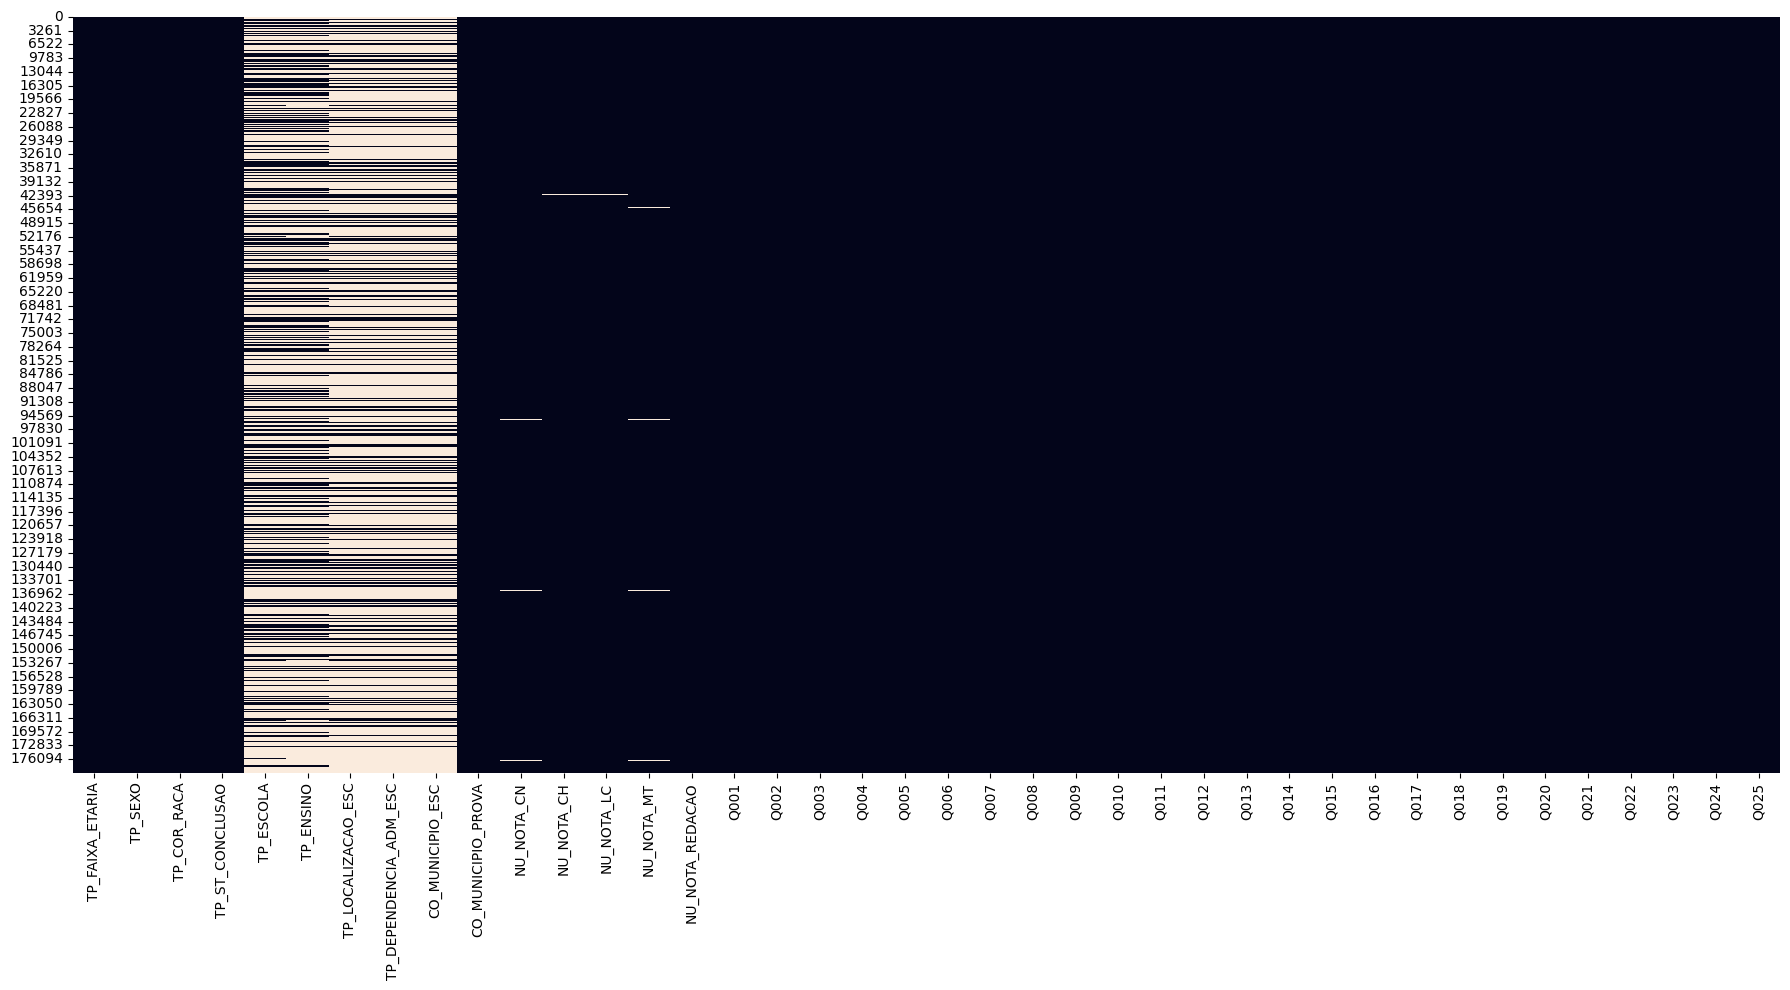

In [13]:
dp.missing_values_heatmap(df_features, output_path='C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/graficos/valores_ausentes.png')

In [14]:
features_final = [

    # Dados do participante 

    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
    
    # Dados do local de aplicação da prova 

    'CO_MUNICIPIO_PROVA',

    # Dados da prova 

    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',

    # Dados do questionário socio-econômico 

    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
    'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
    'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
]

df_features_final = df_features[features_final]
df_final = df_features_final.dropna()
df_final.shape

(177828, 35)

In [15]:
df_final.to_csv(r'C:\Users\jaret\OneDrive\Documents\UFG\TCC\ENEM - final\data\MICRODADOS_RJ_clean_2023.csv', index=False)

In [16]:
df_final.describe()

,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,1.778280e+05,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000
mean,3.303752e+06,512.465107,545.899149,536.499373,559.737140,663.919968
std,1.441286e+03,77.750829,81.057905,69.772011,125.425343,173.549600
min,3.300100e+06,322.700000,293.200000,287.200000,322.300000,40.000000
25%,3.303203e+06,456.500000,496.500000,493.100000,457.200000,540.000000
50%,3.304557e+06,510.700000,552.800000,541.300000,555.100000,640.000000
75%,3.304557e+06,563.900000,602.700000,585.200000,654.900000,800.000000
max,3.306305e+06,868.400000,823.000000,820.800000,958.600000,1000.000000


Found 5 numeric variables to plot: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
Found 29 categorical variables to plot: ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

Generating a single combined boxplot for numeric variables...


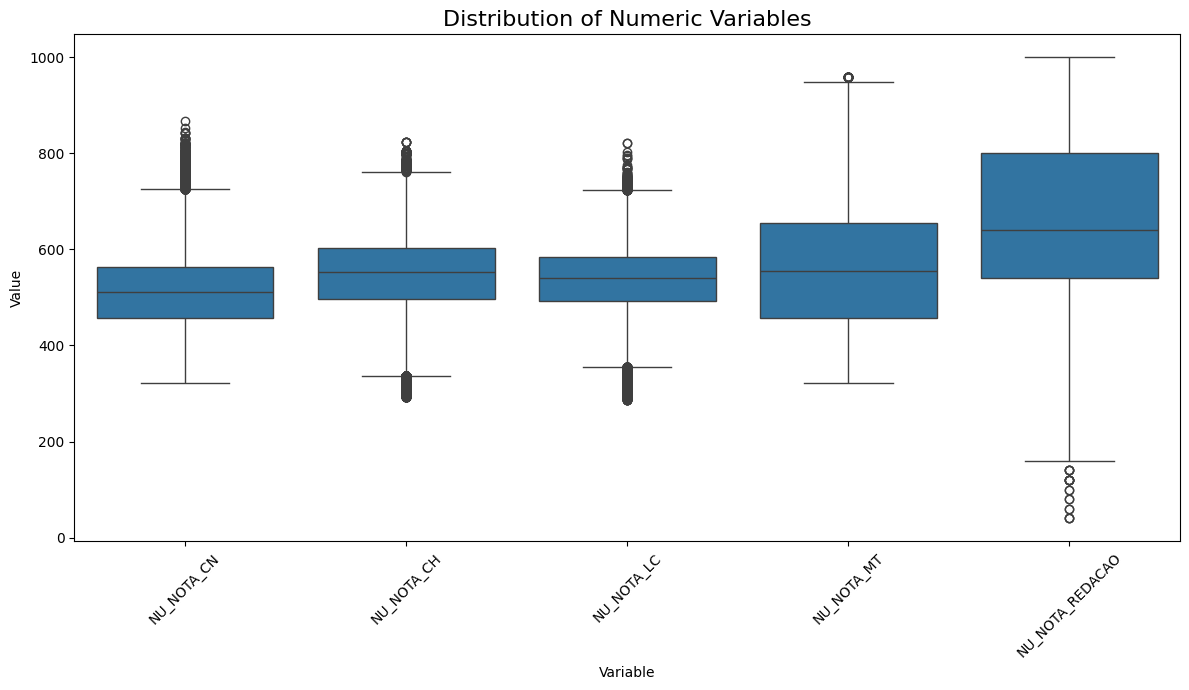

Generating consolidated bar chart figure for categorical variables...


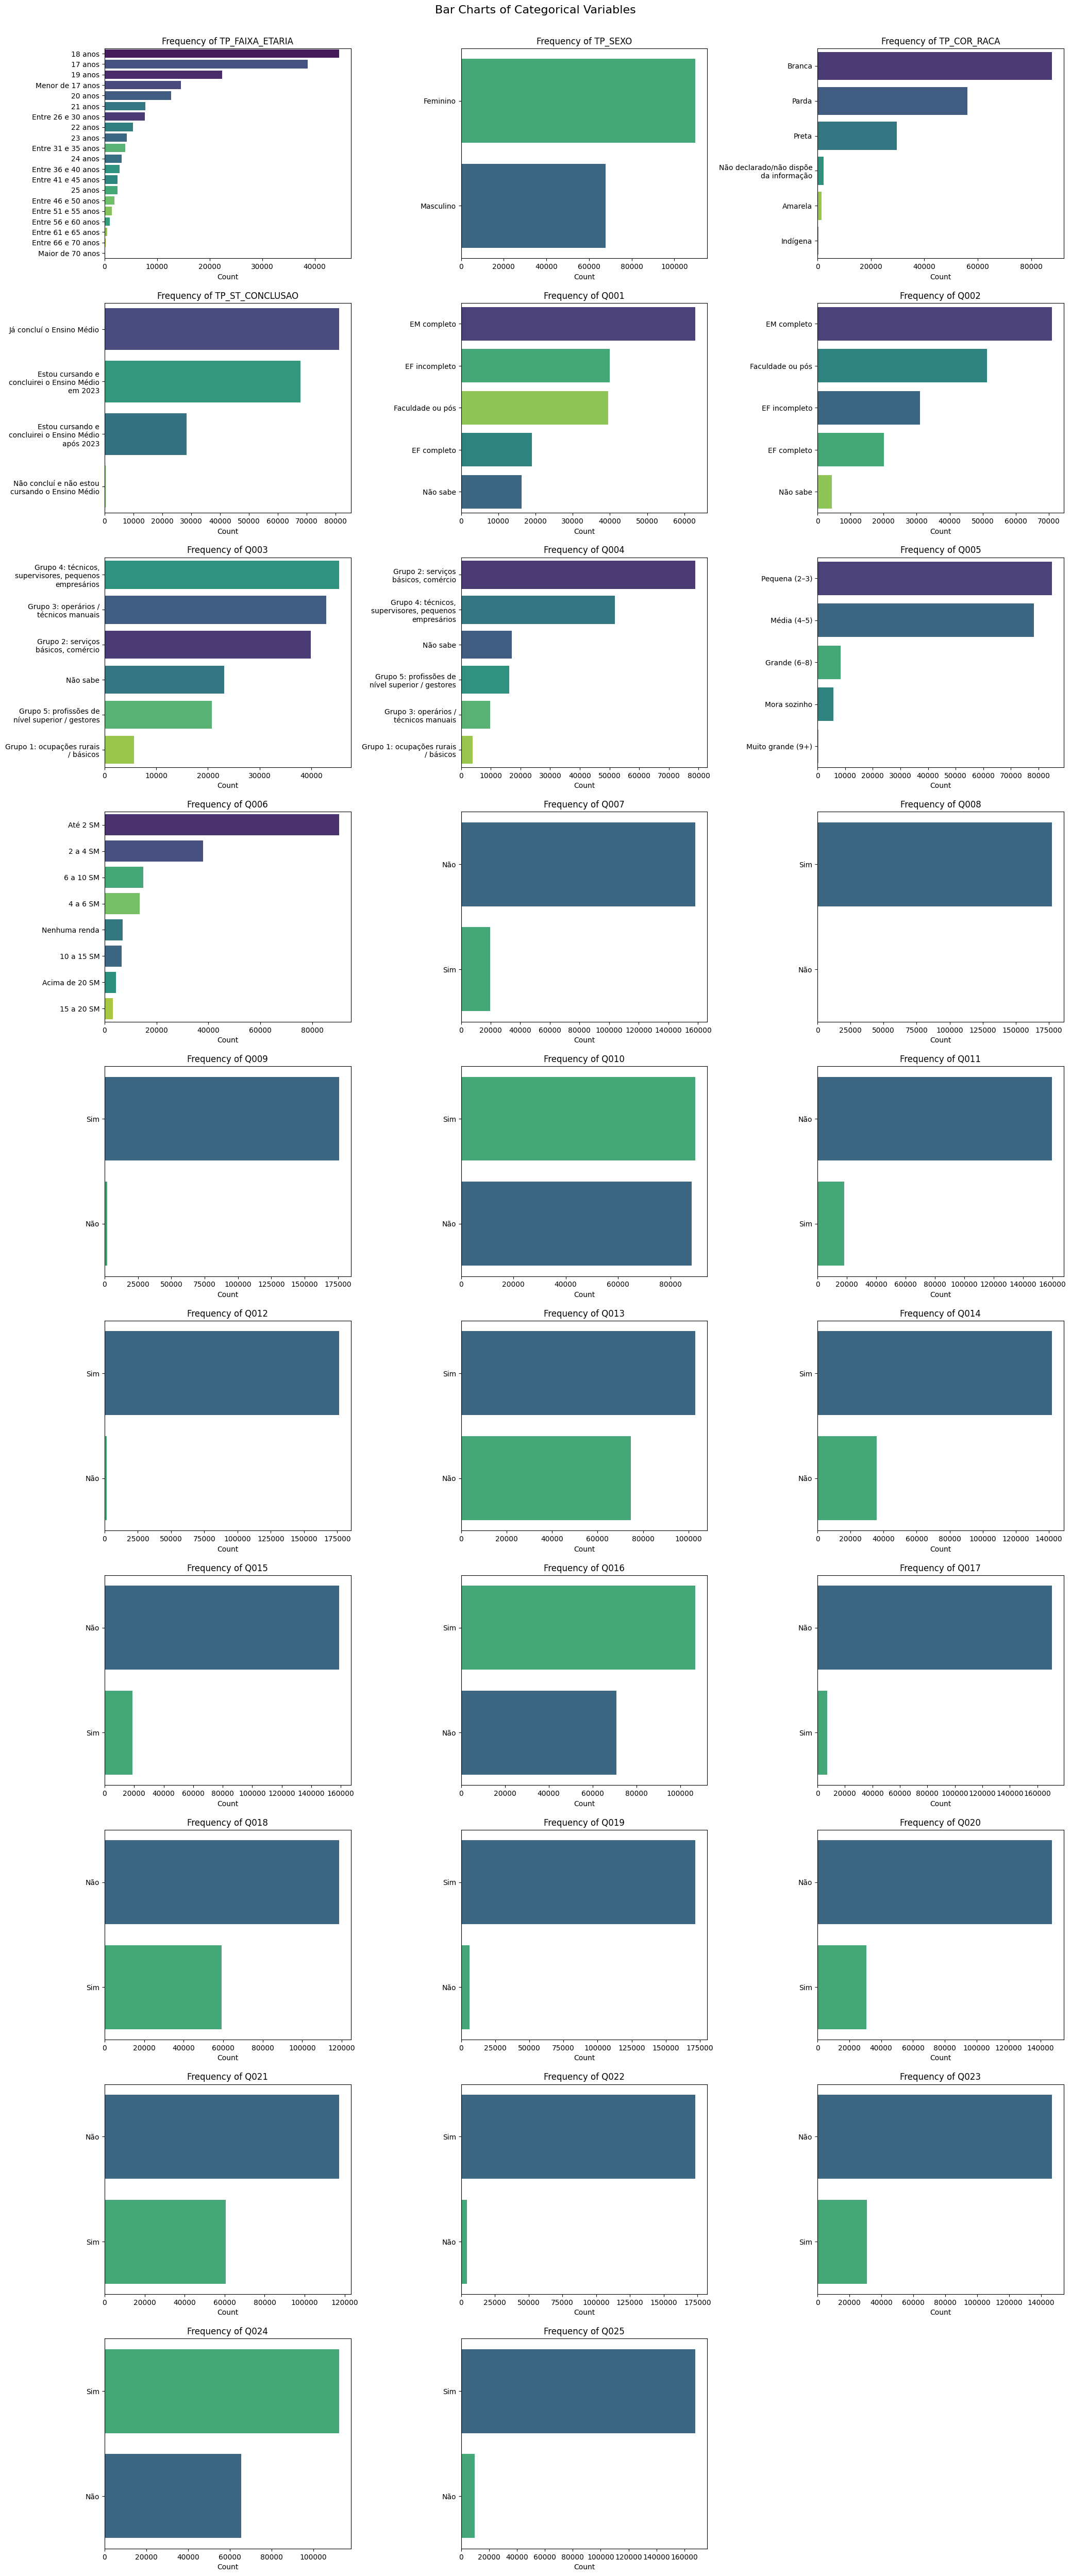

In [17]:
dp.plot_variables(df_final, ignore_cols="CO_MUNICIPIO_PROVA")

Replicação: AM

In [18]:
microdados_path = "C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/data/MICRODADOS_ENEM_2023.csv" 

filter_dict = {
    'SG_UF_PROVA': ['AM'], 
    #'TP_ST_CONCLUSAO': [2]
}

microdados_filtrados = dp.load_and_filter_data(
    microdados_path,
    filter_conditions = filter_dict
)

microdados_filtrados.to_csv(r'C:\Users\jaret\OneDrive\Documents\UFG\TCC\ENEM - final\data\MICRODADOS_AM_2023.csv', index=False)

In [19]:
microdados_filtrados.shape

(92916, 76)

In [20]:
df_present_students = dp.filter_student_presence(microdados_filtrados, mode='all')

Dataset original: (92916, 76)
Após a filtragem (modo='all'): (45007, 76)


In [21]:
features_of_interest = [

    # Dados do participante 

    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO',
    
    # Dados da escola 
    
    'TP_LOCALIZACAO_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'CO_MUNICIPIO_ESC', 
    
    # Dados do local de aplicação da prova 

    'CO_MUNICIPIO_PROVA',

    # Dados da prova 

    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',

    # Dados do questionário socio-econômico 

    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
    'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
    'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
]

score_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

master_mappings = {
    "TP_FAIXA_ETARIA": TP_FAIXA_ETARIA_map,
    "TP_SEXO": TP_SEXO_map,
    "TP_COR_RACA": TP_COR_RACA_map,
    "TP_ESCOLA": TP_ESCOLA_map,
    "TP_LOCALIZACAO_ESC": TP_LOCALIZACAO_ESC_map,
    "TP_DEPENDENCIA_ADM_ESC": TP_DEPENDENCIA_ADM_ESC_map,
    "TP_ENSINO": TP_ENSINO_map,
    'TP_ST_CONCLUSAO': TP_ST_CONCLUSAO_map,
    ("Q001", "Q002"): Q001_Q002_map,
    ("Q003", "Q004"): Q003_Q004_map,
    "Q005": Q005_map,
    "Q006": Q006_map,
    "Q007": Q007_map,
    tuple(["Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017"]): Q008_Q017_map,
    "Q018": Q018_map,
    "Q019": Q019_map,
    "Q020": Q020_map,
    "Q021": Q021_map,
    "Q022": Q022_map,
    "Q023": Q023_map,
    "Q024": Q024_map,
    "Q025": Q025_map, 
    
}

In [22]:
df_features = dp.select_and_map_features(
    df=df_present_students,
    columns_to_select=features_of_interest,
    mappings=master_mappings,
    zero_to_nan_cols=score_cols
)

Selected 40 columns. Shape: (45007, 40)
Data mapping and processing complete.


In [23]:
dp.compute_missing(df_features)

,var_name,missing
6,TP_LOCALIZACAO_ESC,70.104650
7,TP_DEPENDENCIA_ADM_ESC,70.104650
8,CO_MUNICIPIO_ESC,70.104650
5,TP_ENSINO,57.477726
4,TP_ESCOLA,56.422334
13,NU_NOTA_MT,0.495478
10,NU_NOTA_CN,0.486591
11,NU_NOTA_CH,0.139978
12,NU_NOTA_LC,0.022219
1,TP_SEXO,0.000000


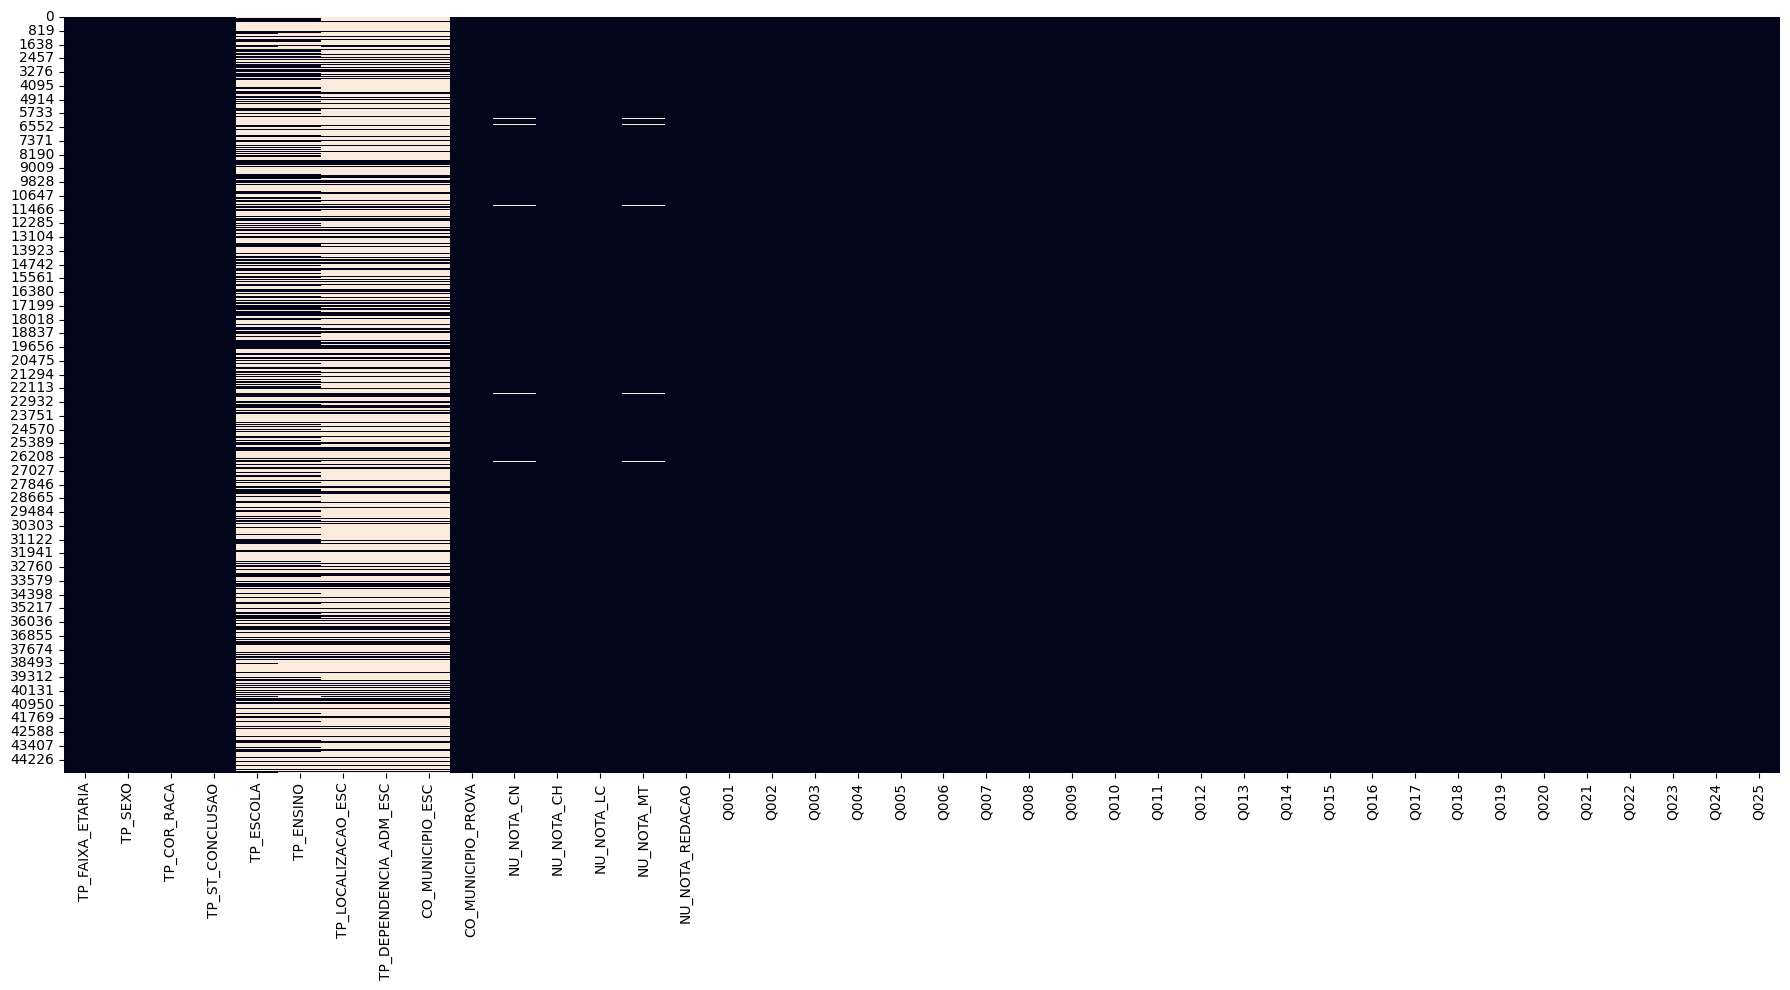

In [24]:
dp.missing_values_heatmap(df_features, output_path='C:/Users/jaret/OneDrive/Documents/UFG/TCC/ENEM - final/graficos/valores_ausentes_am.png')

In [25]:
features_final = [

    # Dados do participante 

    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
    
    # Dados do local de aplicação da prova 

    'CO_MUNICIPIO_PROVA',

    # Dados da prova 

    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',

    # Dados do questionário socio-econômico 

    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
    'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
    'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
]

df_features_final = df_features[features_final]
df_final = df_features_final.dropna()
df_final.shape

(44720, 35)

In [26]:
df_final.to_csv(r'C:\Users\jaret\OneDrive\Documents\UFG\TCC\ENEM - final\data\MICRODADOS_AM_clean_2023.csv', index=False)

In [27]:
df_final.describe()

,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,4.472000e+04,44720.000000,44720.000000,44720.000000,44720.000000,44720.000000
mean,1.302550e+06,476.366167,503.481073,502.136228,491.398032,586.841682
std,6.878767e+02,73.218298,83.208036,72.300955,110.131828,162.928015
min,1.300029e+06,323.300000,293.500000,287.200000,328.200000,40.000000
25%,1.302603e+06,423.300000,446.200000,455.900000,404.300000,480.000000
50%,1.302603e+06,469.900000,506.700000,504.800000,469.600000,560.000000
75%,1.302603e+06,525.600000,562.400000,552.000000,559.600000,680.000000
max,1.304401e+06,797.200000,805.100000,752.400000,958.600000,1000.000000


Found 5 numeric variables to plot: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
Found 29 categorical variables to plot: ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

Generating a single combined boxplot for numeric variables...


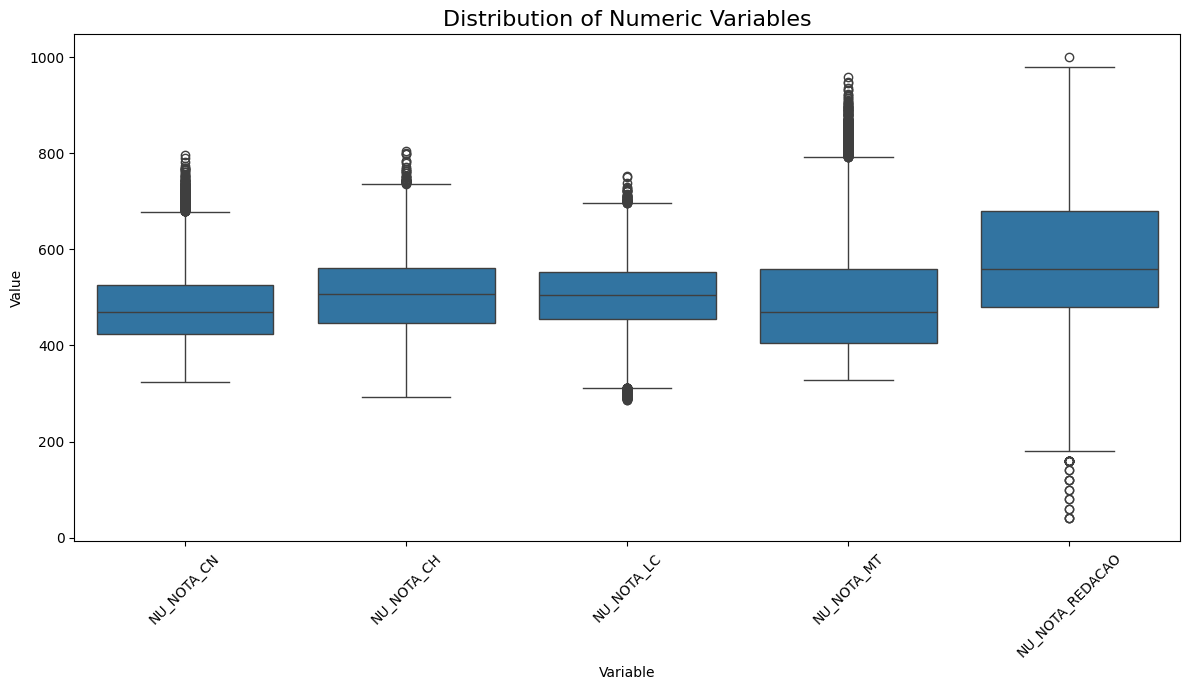

Generating consolidated bar chart figure for categorical variables...


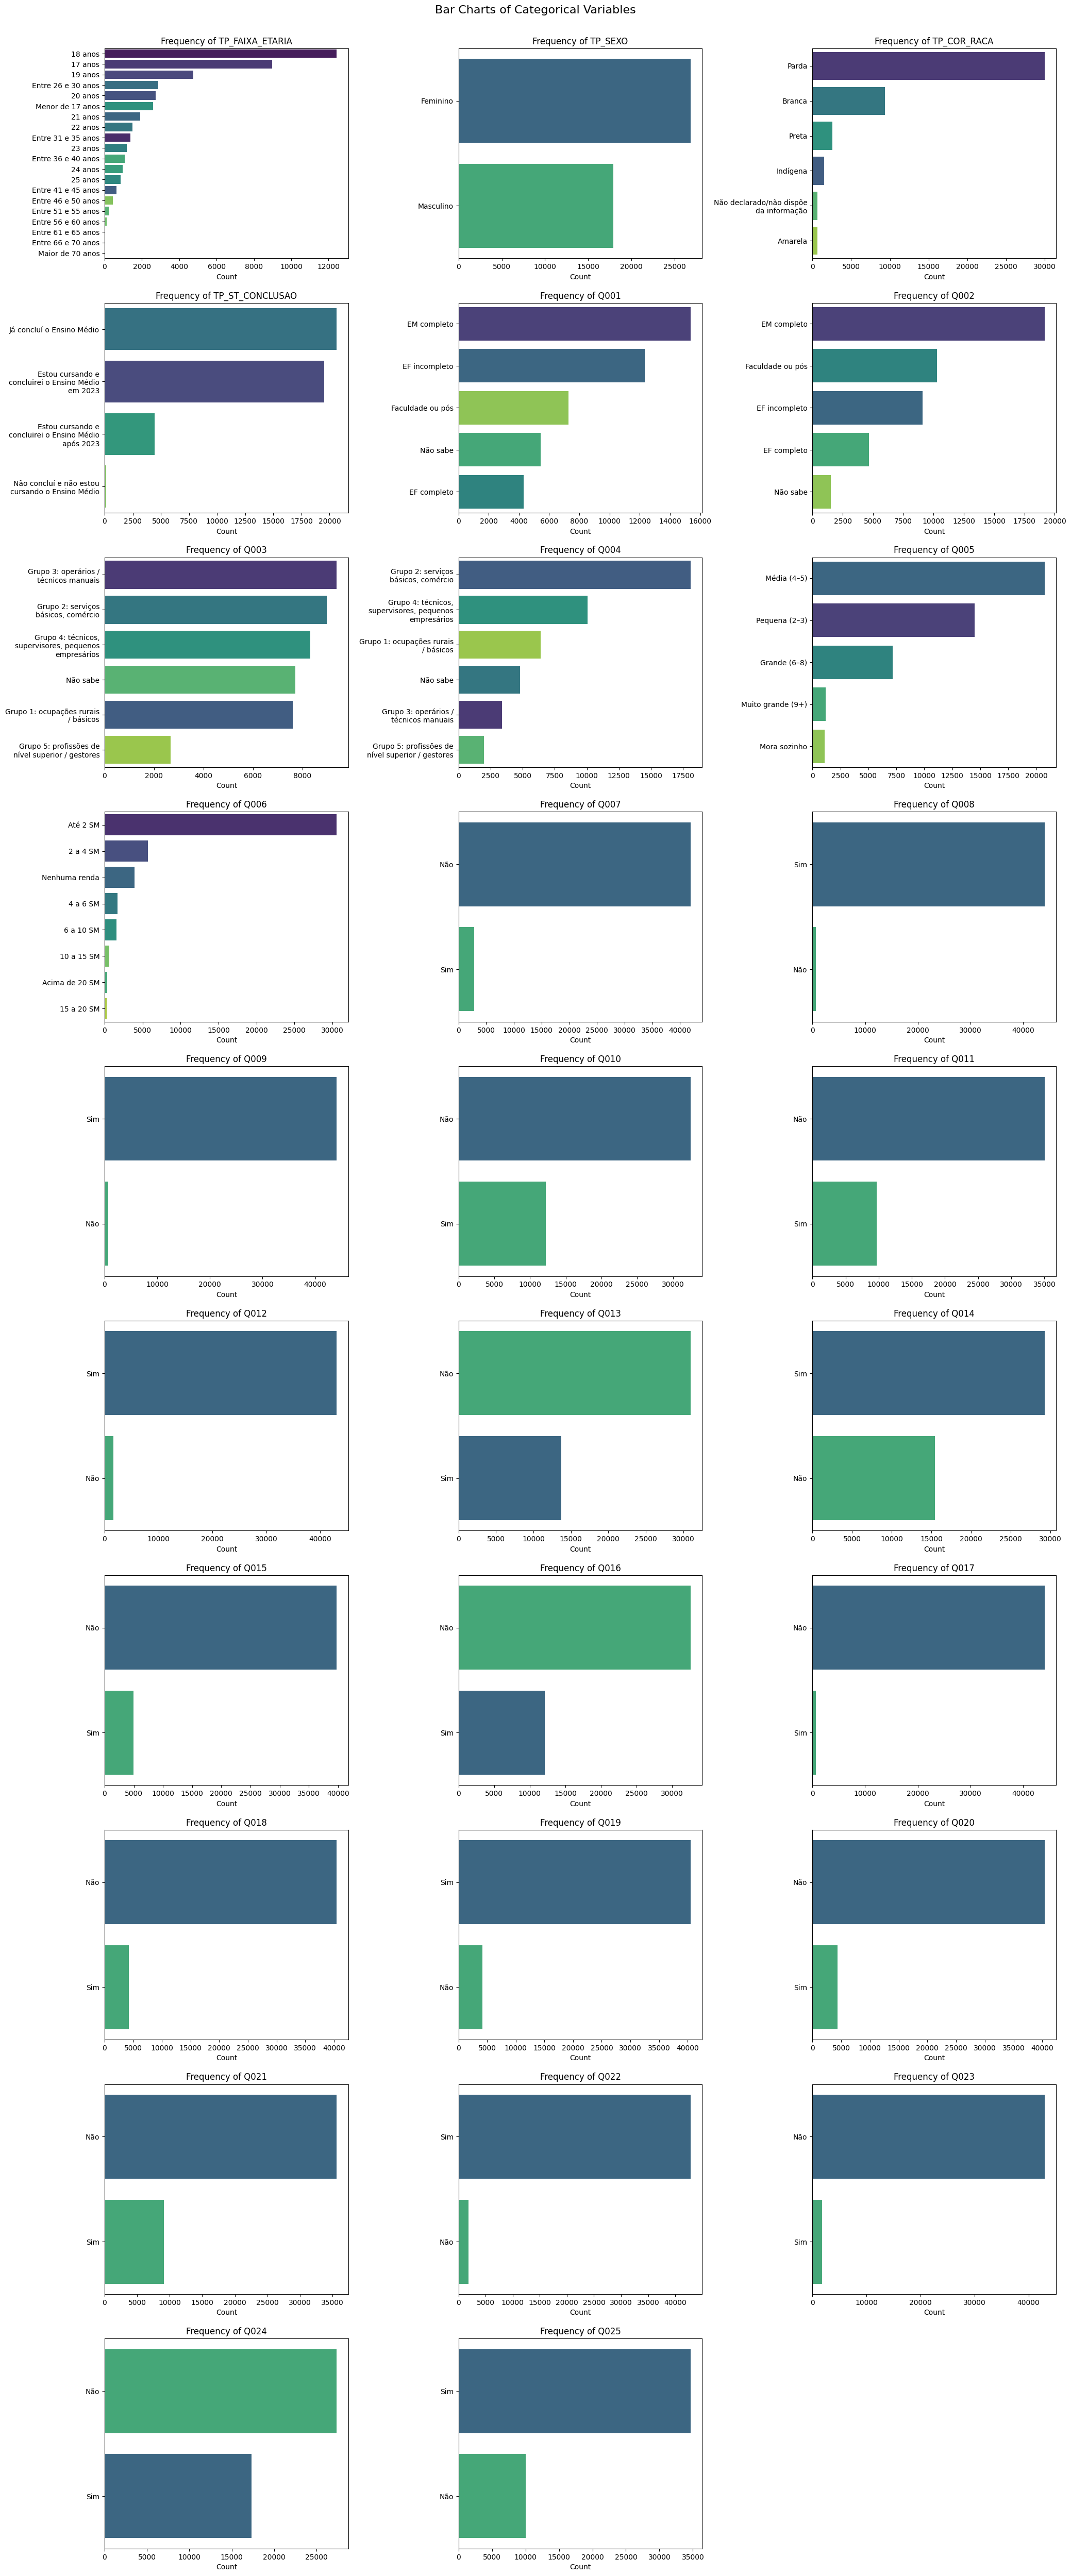

In [28]:
dp.plot_variables(df_final, ignore_cols="CO_MUNICIPIO_PROVA")